In [1]:
import nltk
from nltk.corpus import stopwords
import string

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_excel('Complaint Reports/Mr Clean Complaints.xlsx', sheetname = 'CC Listing')

In [37]:
complaints = df['Summary'].copy().to_frame()

In [38]:
type(complaints)

pandas.core.frame.DataFrame

In [39]:
complaints.head()

,Summary
0,I bought a bottle of the Mr Clean Magic Eraser...
1,I recently bought two bottles of the Mr. Clean...
2,I called 2 and a half months ago about 6 bottl...
3,I have a bottle of the Mr Clean Multipurpose L...
4,I bought the Mr. Clean Multi-Purpose and the M...


In [40]:
complaints.describe()

,Summary
count,992
unique,720
top,I just bought 4 bottles of Mr Cleaner at Sam's...
freq,8


In [42]:
complaints.drop_duplicates(['Summary'],keep='last',inplace=True)

In [43]:
complaints['length'] = complaints['Summary'].apply(len)
complaints.head()

,Summary,length
0,I bought a bottle of the Mr Clean Magic Eraser...,89
1,I recently bought two bottles of the Mr. Clean...,149
2,I called 2 and a half months ago about 6 bottl...,329
3,I have a bottle of the Mr Clean Multipurpose L...,121
5,I bought the Mr. Clean Multi-Purpose and the M...,131


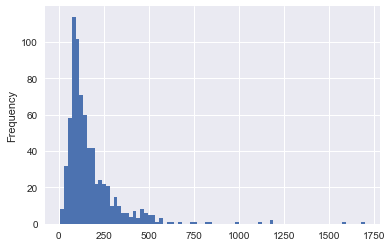

In [46]:
complaints['length'].plot.hist(bins=80)

In [47]:
complaints['length'].describe()

count     720.000000
mean      175.854167
std       161.041549
min         8.000000
25%        86.000000
50%       127.500000
75%       206.250000
max      1698.000000
Name: length, dtype: float64

In [48]:
complaints[complaints['length']==1698]

,Summary,length
31,Oh My Goodness! Where do I start. First your w...,1698


In [53]:
complaints[complaints['length']==1698]['Summary'].iloc[0]

'Oh My Goodness! Where do I start. First your website seems to be: That Mr. Clean is the God of cleanliness. Ask Mr. Clean\'w website anything : and WE WILL BE THE ANSWER TO ALL OF YOUR PROBLEMS! RIDICULOUS!!! Germs are NOT the ENEMY HERE !!!! YOUR products are the enemy. My real reason for emailing you is because I have used Mr. Clean products for a very long time. But now, after using the product that I purchased above. I may STOP USING YOUR PRODUCTS. AS WHERE, OH WHERE DO YOU "EVER" CONSIDER THE ENVIRONMENT IN YOUR PRODUCTS. YOU ARE ADDING: FEBREEZE TO A "CLEAING" PRODUCT!!!!! TO A CLEANING PRODUCT!!!! MR. CLEAN , CLEANS THINGS. FEBREEZE IS A STINKY PRODUCT TO COVER STINKY ODOURS. DON\'T YOU SEE HOW RIDICULOUS THAT IS!!! MR. CLEAN CLEANS. FEBREEZE COVERS. MY EYES AND NOSE WERE BOTH OVERWELMED BY THE STINK OF THE FEBREEZE IN THE ABOVE PRODUCT. REALLY, PLEASE GIVE OUR OCEANS AND MOTHER NATURE A CHANCE BY: DILUTING THE STRENGTH OF YOUR CLEANING PRODUCTS. NOT BY THROWING IN SOME TOTALLY

In [57]:
mess = complaints[complaints['length']==1698]['Summary'].iloc[0]

In [59]:
nopuncmess = [c for c in mess if c not in string.punctuation]
nopuncmess

['O',
 'h',
 ' ',
 'M',
 'y',
 ' ',
 'G',
 'o',
 'o',
 'd',
 'n',
 'e',
 's',
 's',
 ' ',
 'W',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'd',
 'o',
 ' ',
 'I',
 ' ',
 's',
 't',
 'a',
 'r',
 't',
 ' ',
 'F',
 'i',
 'r',
 's',
 't',
 ' ',
 'y',
 'o',
 'u',
 'r',
 ' ',
 'w',
 'e',
 'b',
 's',
 'i',
 't',
 'e',
 ' ',
 's',
 'e',
 'e',
 'm',
 's',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'T',
 'h',
 'a',
 't',
 ' ',
 'M',
 'r',
 ' ',
 'C',
 'l',
 'e',
 'a',
 'n',
 ' ',
 'i',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'G',
 'o',
 'd',
 ' ',
 'o',
 'f',
 ' ',
 'c',
 'l',
 'e',
 'a',
 'n',
 'l',
 'i',
 'n',
 'e',
 's',
 's',
 ' ',
 'A',
 's',
 'k',
 ' ',
 'M',
 'r',
 ' ',
 'C',
 'l',
 'e',
 'a',
 'n',
 'w',
 ' ',
 'w',
 'e',
 'b',
 's',
 'i',
 't',
 'e',
 ' ',
 'a',
 'n',
 'y',
 't',
 'h',
 'i',
 'n',
 'g',
 ' ',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'W',
 'E',
 ' ',
 'W',
 'I',
 'L',
 'L',
 ' ',
 'B',
 'E',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'A',
 'N',
 'S',
 'W',
 'E',
 'R',
 ' ',
 'T',
 'O',
 ' ',
 'A',
 'L',
 'L'

In [63]:
nopuncmess = ''.join(nopuncmess)

In [64]:
nopuncmess

'Oh My Goodness Where do I start First your website seems to be That Mr Clean is the God of cleanliness Ask Mr Cleanw website anything  and WE WILL BE THE ANSWER TO ALL OF YOUR PROBLEMS RIDICULOUS Germs are NOT the ENEMY HERE  YOUR products are the enemy My real reason for emailing you is because I have used Mr Clean products for a very long time But now after using the product that I purchased above I may STOP USING YOUR PRODUCTS AS WHERE OH WHERE DO YOU EVER CONSIDER THE ENVIRONMENT IN YOUR PRODUCTS YOU ARE ADDING FEBREEZE TO A CLEAING PRODUCT TO A CLEANING PRODUCT MR CLEAN  CLEANS THINGS FEBREEZE IS A STINKY PRODUCT TO COVER STINKY ODOURS DONT YOU SEE HOW RIDICULOUS THAT IS MR CLEAN CLEANS FEBREEZE COVERS MY EYES AND NOSE WERE BOTH OVERWELMED BY THE STINK OF THE FEBREEZE IN THE ABOVE PRODUCT REALLY PLEASE GIVE OUR OCEANS AND MOTHER NATURE A CHANCE BY DILUTING THE STRENGTH OF YOUR CLEANING PRODUCTS NOT BY THROWING IN SOME TOTALLY UNNECESSARY FEBREEZE JUST FOR THE HECK OF IT i AM CLEA

In [65]:
nopuncmess.split()

['Oh',
 'My',
 'Goodness',
 'Where',
 'do',
 'I',
 'start',
 'First',
 'your',
 'website',
 'seems',
 'to',
 'be',
 'That',
 'Mr',
 'Clean',
 'is',
 'the',
 'God',
 'of',
 'cleanliness',
 'Ask',
 'Mr',
 'Cleanw',
 'website',
 'anything',
 'and',
 'WE',
 'WILL',
 'BE',
 'THE',
 'ANSWER',
 'TO',
 'ALL',
 'OF',
 'YOUR',
 'PROBLEMS',
 'RIDICULOUS',
 'Germs',
 'are',
 'NOT',
 'the',
 'ENEMY',
 'HERE',
 'YOUR',
 'products',
 'are',
 'the',
 'enemy',
 'My',
 'real',
 'reason',
 'for',
 'emailing',
 'you',
 'is',
 'because',
 'I',
 'have',
 'used',
 'Mr',
 'Clean',
 'products',
 'for',
 'a',
 'very',
 'long',
 'time',
 'But',
 'now',
 'after',
 'using',
 'the',
 'product',
 'that',
 'I',
 'purchased',
 'above',
 'I',
 'may',
 'STOP',
 'USING',
 'YOUR',
 'PRODUCTS',
 'AS',
 'WHERE',
 'OH',
 'WHERE',
 'DO',
 'YOU',
 'EVER',
 'CONSIDER',
 'THE',
 'ENVIRONMENT',
 'IN',
 'YOUR',
 'PRODUCTS',
 'YOU',
 'ARE',
 'ADDING',
 'FEBREEZE',
 'TO',
 'A',
 'CLEAING',
 'PRODUCT',
 'TO',
 'A',
 'CLEANING',
 'PRO

In [67]:
clean_nopuncmess = [word for word in nopuncmess.split() if word.lower() not in stopwords.words('english')]

In [68]:
clean_nopuncmess

['Oh',
 'Goodness',
 'start',
 'First',
 'website',
 'seems',
 'Mr',
 'Clean',
 'God',
 'cleanliness',
 'Ask',
 'Mr',
 'Cleanw',
 'website',
 'anything',
 'ANSWER',
 'PROBLEMS',
 'RIDICULOUS',
 'Germs',
 'ENEMY',
 'products',
 'enemy',
 'real',
 'reason',
 'emailing',
 'used',
 'Mr',
 'Clean',
 'products',
 'long',
 'time',
 'using',
 'product',
 'purchased',
 'may',
 'STOP',
 'USING',
 'PRODUCTS',
 'OH',
 'EVER',
 'CONSIDER',
 'ENVIRONMENT',
 'PRODUCTS',
 'ADDING',
 'FEBREEZE',
 'CLEAING',
 'PRODUCT',
 'CLEANING',
 'PRODUCT',
 'MR',
 'CLEAN',
 'CLEANS',
 'THINGS',
 'FEBREEZE',
 'STINKY',
 'PRODUCT',
 'COVER',
 'STINKY',
 'ODOURS',
 'DONT',
 'SEE',
 'RIDICULOUS',
 'MR',
 'CLEAN',
 'CLEANS',
 'FEBREEZE',
 'COVERS',
 'EYES',
 'NOSE',
 'OVERWELMED',
 'STINK',
 'FEBREEZE',
 'PRODUCT',
 'REALLY',
 'PLEASE',
 'GIVE',
 'OCEANS',
 'MOTHER',
 'NATURE',
 'CHANCE',
 'DILUTING',
 'STRENGTH',
 'CLEANING',
 'PRODUCTS',
 'THROWING',
 'TOTALLY',
 'UNNECESSARY',
 'FEBREEZE',
 'HECK',
 'CLEANING',
 'HOM

In [77]:
def text_process(messytext):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words'''
    
    nopunc = [char for char in messytext if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [69]:
complaints.head()

,Summary,length
0,I bought a bottle of the Mr Clean Magic Eraser...,89
1,I recently bought two bottles of the Mr. Clean...,149
2,I called 2 and a half months ago about 6 bottl...,329
3,I have a bottle of the Mr Clean Multipurpose L...,121
5,I bought the Mr. Clean Multi-Purpose and the M...,131


In [78]:
complaints['Summary'].head()

0    I bought a bottle of the Mr Clean Magic Eraser...
1    I recently bought two bottles of the Mr. Clean...
2    I called 2 and a half months ago about 6 bottl...
3    I have a bottle of the Mr Clean Multipurpose L...
5    I bought the Mr. Clean Multi-Purpose and the M...
Name: Summary, dtype: object

In [85]:
complaints['Summary'].head(5).apply(text_process)

0    [bought, bottle, Mr, Clean, Magic, Eraser, wat...
1    [recently, bought, two, bottles, Mr, Clean, Li...
2    [called, 2, half, months, ago, 6, bottles, Mr,...
3    [bottle, Mr, Clean, Multipurpose, Liquid, noti...
5    [bought, Mr, Clean, MultiPurpose, Mr, Clean, l...
Name: Summary, dtype: object

In [82]:
# cleanercomplaintsdf = complaints['Summary'].head(5).apply(text_process).to_frame()
# type(cleanercomplaintsdf)
# cleanercomplaintsdf.head()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(complaints['Summary'])

In [88]:
print(len(bow_transformer.vocabulary_))

2251


In [89]:
compl4 = complaints['Summary'][3]

In [90]:
print(compl4)

I have a bottle of the Mr Clean Multipurpose Liquid and I notice some gel like substance in the bottom is it safe to use.


In [93]:
bow4 = bow_transformer.transform([compl4])

In [99]:
bow_transformer.get_feature_names()[2250]

'youve'

In [100]:
complaints_bow = bow_transformer.transform(complaints['Summary'])

In [102]:
print('Shape of the Spare Matrix: ', complaints_bow.shape)

Shape of the Spare Matrix:  (720, 2251)


In [103]:
complaints_bow.nnz

11198

In [104]:
sparsity = (100.0 * complaints_bow.nnz/(complaints_bow.shape[0] * complaints_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.6909274890172269


In [105]:
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
tfidf_transformer = TfidfTransformer().fit(complaints_bow)

In [107]:
tfidf4 = tfidf_transformer.transform(bow4)

In [108]:
print(tfidf4) #Inverse document frequency and term frequency

  (0, 2134)	0.219535124891
  (0, 1991)	0.420125460128
  (0, 1807)	0.439637219229
  (0, 1544)	0.357978924982
  (0, 1392)	0.172523085896
  (0, 1182)	0.420125460128
  (0, 711)	0.330478645087
  (0, 707)	0.161566490815
  (0, 376)	0.237594493686
  (0, 368)	0.0855716203164
  (0, 335)	0.201133440251
  (0, 179)	0.08972926936


In [111]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['bought']]

1.9176786571490032

In [112]:
complaints_tfidf = tfidf_transformer.transform(complaints_bow)

In [113]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate' ]
neutral_vocab = [ 'movie','the','sound','actors','did','know','words','not' ]

In [118]:
def word_feats(words):
    return dict([(word, True) for word in words])               

In [119]:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

In [120]:
train_set = negative_features + positive_features + neutral_features

In [142]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = ['awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = ['bad', 'terrible','useless', 'hate', ':(','mildew','odor' ]
neutral_vocab = ['bottle','liquid','the','sound','was','is','actors','did','know','words','not']
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
sentence = "Awesome product, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.8
Negative: 0.2


In [143]:
#predict on first 5
for complaint in complaints['Summary'].head():
    complaint_in_lowercase = complaint.lower()
    words = complaint_in_lowercase.split(' ')
    for word in words:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    print(complaint + '\n'+'Positive: ' + str(float(pos)/len(words)))
    print('Negative: ' + str(float(neg)/len(words)))        

I bought a bottle of the Mr Clean Magic Eraser and it watery like it has been water down.
Positive: 0.8947368421052632
Negative: 0.2631578947368421
I recently bought two bottles of the Mr. Clean Liquid and one bottle has an unusual scent. I can't really explain how it smells but it is really bad.
Positive: 1.103448275862069
Negative: 0.4827586206896552
I called 2 and a half months ago about 6 bottles of the Mr Clean Multisurface Meadows & Rain Febreze cleaners that had a bad odor, like a mildew scent. I was promised some coupons and I haven’t received anything from Mr Clean. The lady I spoke to I couldn’t understand what she was saying clearly. I have one of the bottles left.
Positive: 1.0317460317460319
Negative: 0.5238095238095238
I have a bottle of the Mr Clean Multipurpose Liquid and I notice some gel like substance in the bottom is it safe to use.
Positive: 3.16
Negative: 1.68
I bought the Mr. Clean Multi-Purpose and the Mr. Clean liquid Muscle Gel at Home Depot .They have no suds